# Control Systems : Assignment 1

# Import numpy as np

In [25]:
from numpy.linalg import inv
import matplotlib.pyplot as plt

# The external force function , can be modellled as per your requirement

In [26]:
def F(t):
    F=[0,0]
    w=2*np.pi
    if t>15:
        return F
    else:
        F[0]=1*np.sin(w*t)
        return F

# Solving for X''

In [33]:
def f(y,t):
    # physical constants of the system
    m = 4.333
    k = 2.551
    b =0.8 #0.442
    A=np.array([[m,0],[0,1]])
    B=np.array([[b,k],[-1,0]])
    return(np.dot(inv(A),F(t)-np.dot(B,y)))

# Function for rk4 implementation

In [34]:
def rk4(y,t,dt):
    k1=f(y,t)
    k2=f(y*k1*0.5*dt,t+dt*0.5)
    k3=f(y*k2*0.5*dt,t+dt*0.5)
    k4=f(y+k3*dt,t+dt)
    return(dt * (k1 + 2*k2 + 2*k3 + k4) /6)

# Function to call state

In [29]:
def call_state():   
    # initializations matrices
    v_data=[]
    p_data=[]
    y=np.array([1,1])
    h=0.3# dt used during simulation
    time=np.arange(0,1000,h)
    state=[]
    # simulation across time
    for t in time:
        y=y+rk4(y,t,h)
        state.append(y)
        v_data.append(y[0])
        p_data.append(y[1])
    return(p_data,v_data)

#  Function for Animation

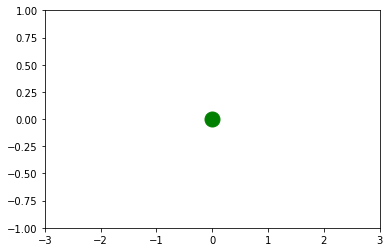

In [41]:
# initialization of plot , line and point objects
fig = plt.figure() 
ax = plt.axes(xlim=(-3, 3), ylim=(-1, 1)) 
point, = ax.plot(0, 0,marker="o",color="green",markersize=15) 
line, = ax.plot([],[],lw=2)
wall, = ax.plot([],[],lw=2)
def init():
    line.set_data([], []) 
    point.set_data([],[])
    wall.set_data([], []) 
    return point, line,wall
# update the animation with each frame
def animate(frame):
    p,v=call_state()
    point.set_data([p[frame]],[0])
    line.set_data(np.linspace(-3,p[frame],100),np.zeros(100))
    wall.set_data(-3*np.ones(100),np.linspace(-0.5,0.5,100))
    return point,line,wall

In [44]:
from matplotlib.animation import FuncAnimation
anim = FuncAnimation(fig, animate,init_func=init,frames=300, interval=20, blit=False)

In [45]:
from IPython import display
video=anim.to_html5_video()
html=display.HTML(video)
display.display(html)
plt.close()